# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# Importing dataset


In [5]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Preforming EDA on Data


# Renaming columns

In [6]:
# Renaming the YearsExperience Column As Yrexp
df1 = df.rename({'YearsExperience':'Yrexp'}, axis=1)
df1.head()

,Yrexp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Checking Datatypes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Applying Descriptive Statistics


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Null values checking


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# We need to check whether duplicate values are present or not


In [10]:
df1[df1.duplicated(keep = False)]

,Yrexp,Salary


There is no duplicate data present in side the data set

# Check whether outliers are present inside the data or not


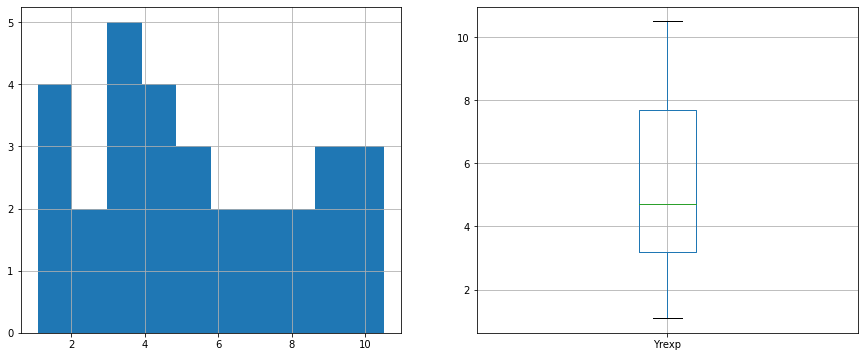

In [11]:
#checking whether outliers are present in YrExp column
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
df1['Yrexp'].hist()
plt.subplot(1,2,2)
df1.boxplot(column=['Yrexp'])

plt.show()

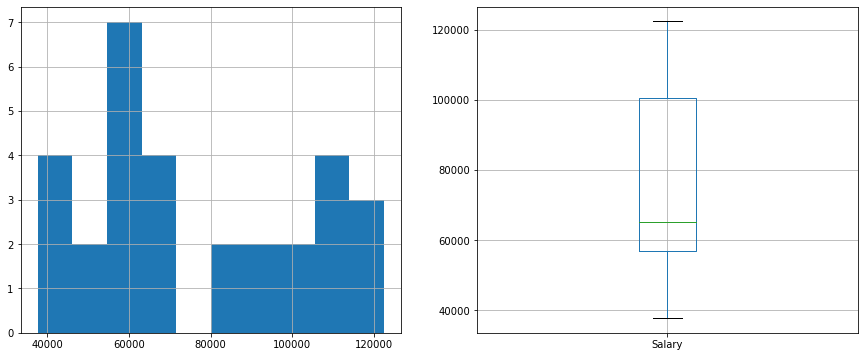

In [12]:
#checking whether outliers are present in Salary column
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
df1['Salary'].hist()
plt.subplot(1,2,2)
df1.boxplot(column=['Salary'])

plt.show()

From the above plots, we found that there is no outleirs present inside the YrExp and Salary data column

# Checking the Correlation between variables


In [13]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


# Visualization of Correlation beteen x and y


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

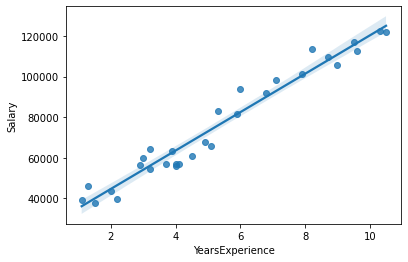

In [14]:
# regplot = regression plot
sns.regplot(x=df["YearsExperience"],y=df["Salary"])

# Checking for Homoscedasticity or Hetroscedasticity


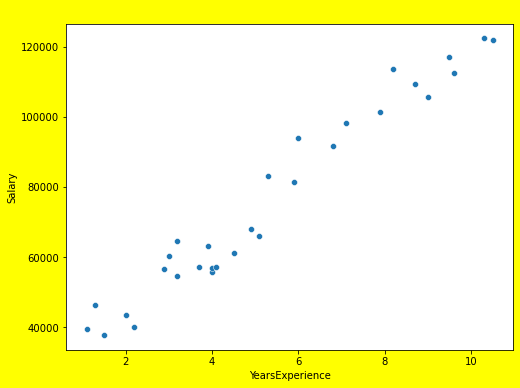

In [15]:
plt.figure(figsize = (8,6), facecolor = "yellow")
sns.scatterplot(x = df["YearsExperience"], y = df["Salary"])
plt.title(" ", fontweight = 'bold', fontsize = 14)
plt.show()

In [16]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

# As you can see in above graph

*It shows as the YearsExperience Increases Salary also increases.

*the variation is homoscedasticity.

# Feature Engineering


# Trying different transformation of data to estimate normal distribution and to remove any skewness


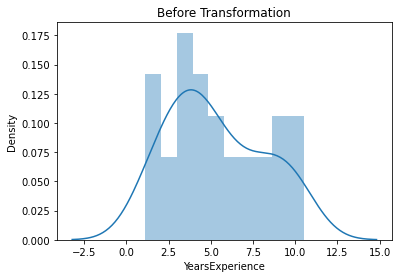

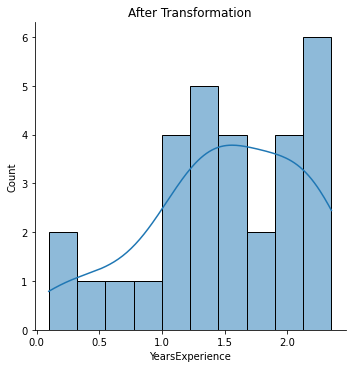

In [17]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

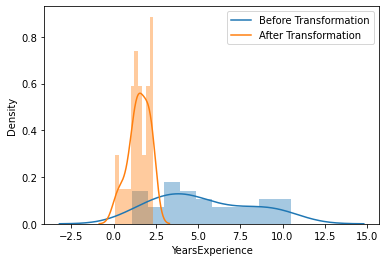

In [18]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

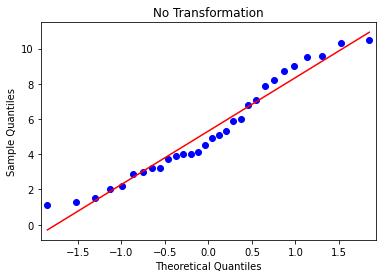

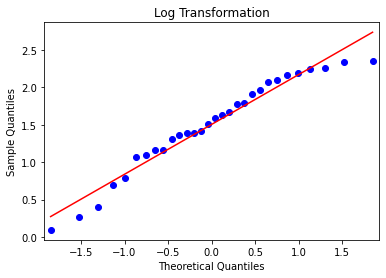

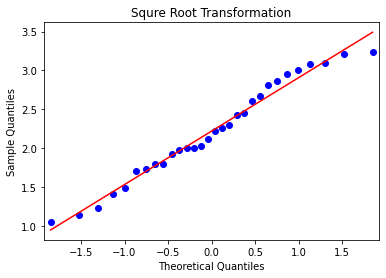

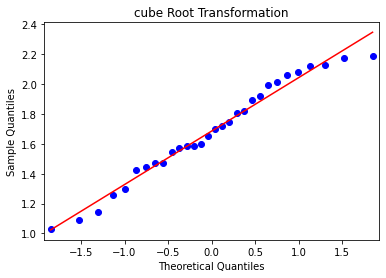

In [19]:
smf.qqplot(df["YearsExperience"], line = 'r')
plt.title('No Transformation')
smf.qqplot(np.log(df["YearsExperience"]), line = 'r')
plt.title("Log Transformation")
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Squre Root Transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('cube Root Transformation')
plt.show()

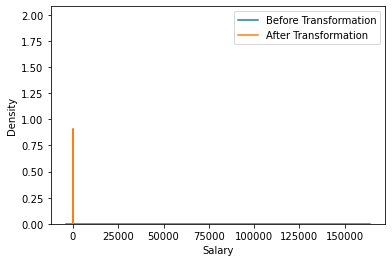

In [20]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.distplot(np.log(df['Salary']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

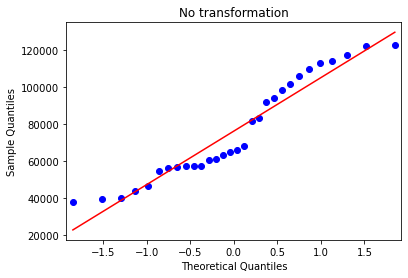

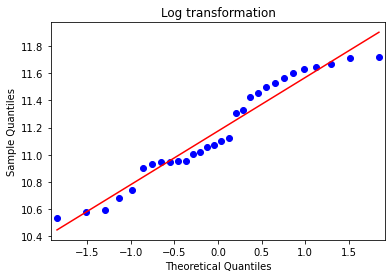

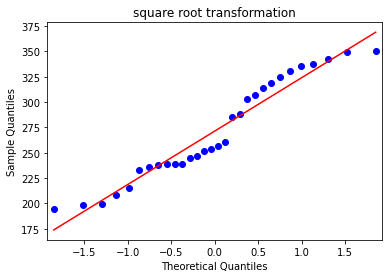

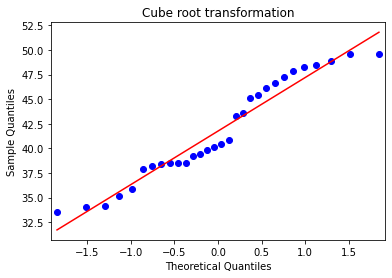

In [21]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Important Note:
    
*We only Perform any data transformation when the data is skewed or not normal

# Fitting a Linear Regression Model

Using Ordinary least squares (OLS) regression

It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [22]:
model = sm.ols('Yrexp~Salary', data = df1).fit()


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Yrexp   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        14:07:19   Log-Likelihood:                -26.168
No. Observations:                  30   AIC:                             56.34
Df Residuals:                      28   BIC:                             59.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.3832      0.327     -7.281      0.000      -3.054      -1.713
Salary         0.0001   4.06e-06     24.950      0.000     9.3e-05       0.000
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Square Root transformation on data


In [24]:
model1 = sm.ols('np.sqrt(Yrexp)~np.sqrt(Salary)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.sqrt(Yrexp)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           7.58e-19
Time:                        14:07:21   Log-Likelihood:                 14.149
No. Observations:                  30   AIC:                            -24.30
Df Residuals:                      28   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1612      0.161     -7.208      0.000      -1.491      -0.831
np.sqrt(Salary)     0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Cube Root transformation on Data


In [25]:
model2 = sm.ols('np.cbrt(Yrexp)~np.cbrt(Salary)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.cbrt(Yrexp)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           6.37e-18
Time:                        14:07:23   Log-Likelihood:                 31.493
No. Observations:                  30   AIC:                            -58.99
Df Residuals:                      28   BIC:                            -56.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.9290      0.134     -6.937      0.000      -1.203      -0.655
np.cbrt(Salary)     0.0626      0.003     19.659      0.000       0.056       0.069
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                1.612
Skew:                          -0.564   Prob(JB):                        0.447
Kurtosis:                       3.124   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log transformation on Data


In [26]:
model3 = sm.ols('np.log(Yrexp)~np.log(Salary)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Yrexp)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Sat, 30 Jul 2022   Prob (F-statistic):           7.40e-16
Time:                        14:07:25   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -16.4901      1.101    -14.977      0.000     -18.745     -14.235
np.log(Salary)     1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Validation


# Comparing different models with respect to their Root Mean Squared Errors


# We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
model1_pred_y =np.square(model1.predict(df1['Salary']))
model2_pred_y =pow(model2.predict(df1['Salary']),3)
model3_pred_y =np.exp(model3.predict(df1['Salary']))

In [29]:
model1_rmse =np.sqrt(mean_squared_error(df1['Yrexp'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['Yrexp'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['Yrexp'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 0.5991950540452539 
model1= 0.5832153569122785 
model2= 0.5912959035338435 
model3= 0.6377755378218417


In [30]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model1'

# As model2 has the minimum RMSE and highest Adjusted R-squared score. Hence, we are going to use model2 to predict our values

*Model2 is the model where we did log transformation on both dependent variable as well as on independent variable

# Predicting values from Model with Log Transformation on the Data


In [31]:
predicted = pd.DataFrame()
predicted['Salary'] = df1.Salary
predicted['Yrexp'] = df1.Yrexp
predicted['Predicted_Yrexp'] = pd.DataFrame(np.exp(model2.predict(predicted.Salary)))
predicted 

,Salary,Yrexp,Predicted_Yrexp
0,39343.0,1.1,3.319881
1,46205.0,1.3,3.732703
2,37731.0,1.5,3.223430
3,43525.0,2.0,3.570969
4,39891.0,2.2,3.352707
5,56642.0,2.9,4.370662
6,60150.0,3.0,4.588492
7,54445.0,3.2,4.235167
8,64445.0,3.2,4.857822
9,57189.0,3.7,4.404506


# Predicitng from Original Model without any data transformation


In [32]:
predicted1 = pd.DataFrame()
predicted1['Salary'] = df1.Salary
predicted1['Yrexp'] = df1.Yrexp
predicted1['Predicted_Yrexp'] = pd.DataFrame(model.predict(predicted1.Salary))
predicted1

,Salary,Yrexp,Predicted_Yrexp
0,39343.0,1.1,1.600934
1,46205.0,1.3,2.295819
2,37731.0,1.5,1.437694
3,43525.0,2.0,2.024427
4,39891.0,2.2,1.656428
5,56642.0,2.9,3.352729
6,60150.0,3.0,3.707969
7,54445.0,3.2,3.130248
8,64445.0,3.2,4.142905
9,57189.0,3.7,3.408121
